### Search terms used in pubmed "novel coronavirus or covid-19 or coronavirus disease-2019". 

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 15000
pd.options.display.max_columns = 15000
%matplotlib inline

In [5]:
covid19 = pd.read_csv('../data/output/covid19_04_2022.csv', sep = ",")

In [6]:
covid19.head()

,PMID,Title,ISOAbbreviation,journal_title,Abstract,Journalinfo_country,Published_year,Keyword_list,publication_type,medline_citation,pubmed_year,Affiliation
0,32588884,Influence of Corticosteroid Dose on Viral Shed...,Clin Infect Dis,Clinical infectious diseases : an official pub...,NaN,United States,2020.0,NaN,Journal Article,MEDLINE,2020,State Key Laboratory for Diagnosis and Treatme...
1,32588877,High-dose but Not Low-dose Corticosteroids Pot...,Clin Infect Dis,Clinical infectious diseases : an official pub...,NaN,United States,NaN,NaN,Letter,MEDLINE,2020,Department of Respiratory and Critical Care Me...
2,32588837,[Evaluation of incidence and risk profile for ...,Rev Esp Salud Publica,Revista espanola de salud publica,Population-based data on the current Covid-19 ...,Spain,NaN,"Adult,COVID-19,Comorbidity,Incidence,Risk,Spain",Journal Article,MEDLINE,2020,Servicio de Atención Primaria Camp de Tarragon...
3,32588812,Insights into the Use of C-Reactive Protein as...,Am J Trop Med Hyg,The American journal of tropical medicine and ...,Approximately 20% of patients infected with SA...,United States,NaN,NaN,Journal Article,MEDLINE,2020,"1College of Pharmacy, Roosevelt University, Sc..."
4,32588810,Threat of COVID-19 Vaccine Hesitancy in Pakist...,Am J Trop Med Hyg,The American journal of tropical medicine and ...,Immediately after declaring COVID-19 as a pand...,United States,NaN,NaN,Journal Article,MEDLINE,2020,"1Department of Clinical Pharmacy, College of P..."


## Check Nulls

In [7]:
covid19.isnull().sum()

PMID                        0
Title                     639
ISOAbbreviation            12
journal_title               0
Abstract                63682
Journalinfo_country        26
Published_year         250814
Keyword_list            96373
publication_type            1
medline_citation            0
pubmed_year                 0
Affiliation             12119
dtype: int64

In [8]:
covid19.publication_type = covid19.publication_type.str.replace('Journal Article,', "", regex = True)
covid19.publication_type = covid19.publication_type.str.replace(',Journal Article', "", regex = True)


## Analysis manuscript without review articles

In [9]:
reviews_removed = covid19[covid19.publication_type.str.contains("Review|Comment|Editorial|Letter|Published Erratum") == False]

reviews_removed.publication_type.value_counts().reset_index().head(10)

,index,publication_type
0,Journal Article,148632
1,Case Reports,10969
2,Observational Study,3423
3,Preprint,3230
4,Multicenter Study,1992
5,News,1870
6,Comparative Study,1559
7,Randomized Controlled Trial,791
8,English Abstract,651
9,"Multicenter Study,Observational Study",637


<Figure size 1296x720 with 0 Axes>

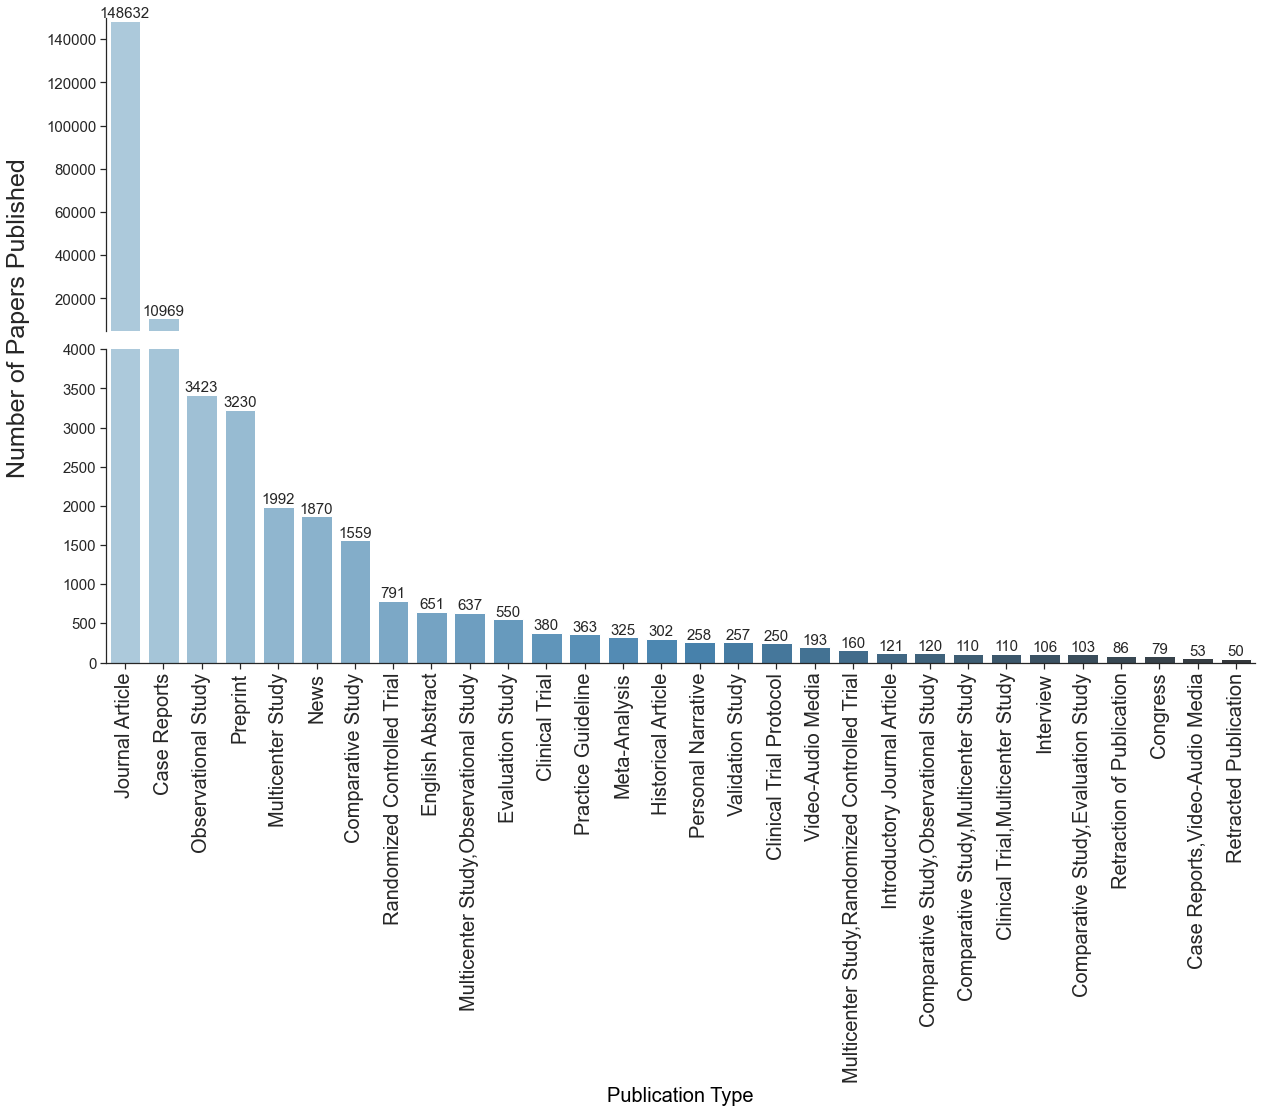

In [10]:
publication_type = reviews_removed.groupby('publication_type')['PMID'].count().reset_index()\
                        .rename(columns = {'PMID' : 'count'}) \
                        .sort_values('count', ascending =False).reset_index(drop= True).head(30) \


sns.set(rc={'figure.figsize':(18,10)}, style ='white')
sns.despine()
sns.set_style("ticks")

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,sharex=True) # define subplots
ax1.tick_params(labelsize=15) # yaxis ticks size
ax2.tick_params(labelsize=15) # yaxis ticks size

ax1 =sns.barplot(x = 'publication_type', y = 'count', data = publication_type, palette ="Blues_d", ax = ax1)
ax2 =sns.barplot(x = 'publication_type', y = 'count', data = publication_type, palette ="Blues_d", ax = ax2)

# labels on top of bar
ax1.bar_label(ax1.containers[0], fontsize=15) 
ax2.bar_label(ax2.containers[0], fontsize=15)

#set limits for sub plots to split yaxis
ax1.set_ylim(5000, 150000)
ax2.set_ylim(0, 4000)

# remove labels in sub plots
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("") 
ax2.set_ylabel("")

# removes borders
sns.despine(ax=ax1, right = True)
sns.despine(ax=ax1, bottom = True)
sns.despine(ax=ax2, right = True)


fig.tight_layout()
fig.text(-0.02, 0.55, "Number of Papers Published", va="center", rotation="vertical", fontsize = 25)
plt.xlabel('Publication Type',fontsize = 20, color = 'black')
plt.xticks(fontsize = 20, rotation = 90)
plt.savefig("../data/numbers_per_year.png",  bbox_inches="tight")
plt.show();


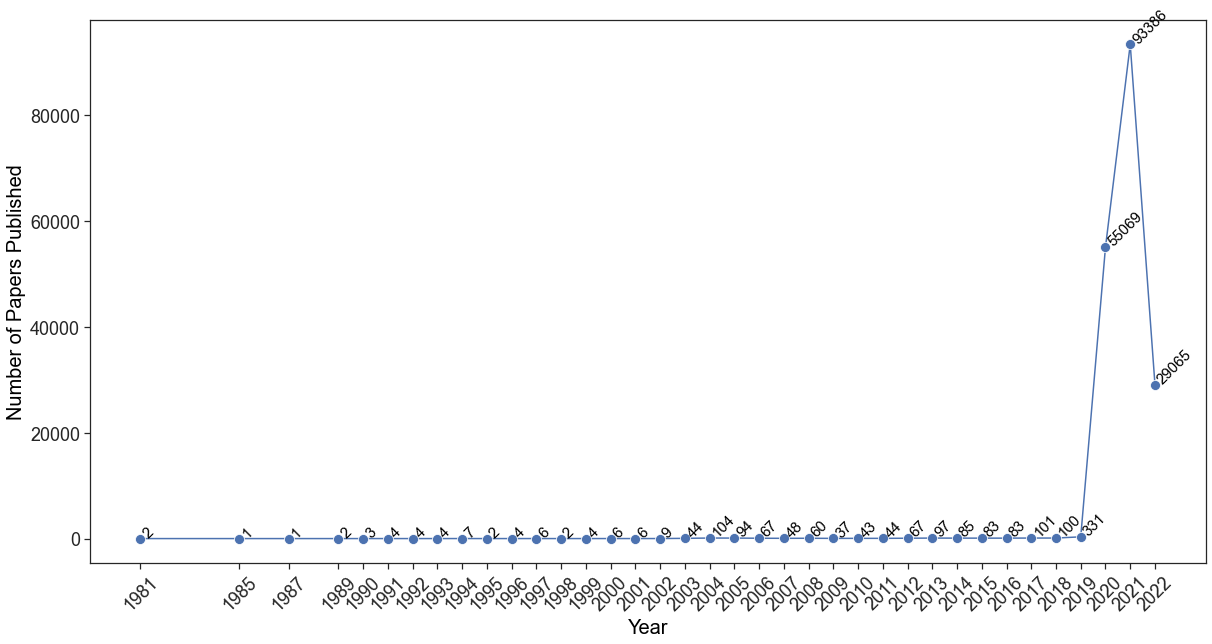

In [11]:
sns.set(rc={'figure.figsize':(20,10)}, style ='white' )
sns.set_style("ticks")
num_published_year= reviews_removed.groupby('pubmed_year')['PMID'].count().reset_index()\
                        .sort_values('pubmed_year', ascending =False) \
                        .rename(columns = {'PMID' : 'count'})

ax =sns.lineplot(x = 'pubmed_year', y = 'count', data = num_published_year, marker = 'o', markersize= 10)
ax.set(xticks=num_published_year.pubmed_year.values)
plt.xlabel('Year',fontsize = 20, color = 'black')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'black')
plt.xticks(fontsize = 18, rotation = 45)
plt.yticks(fontsize = 18)


# label points on the plot
for x, y in zip(num_published_year['pubmed_year'], num_published_year['count']):
     plt.text(
     x = x,
     y = y + 300,
     s = '{:.0f}'.format(y),
    fontsize= 15,
         rotation = 45,
     color = 'black') # set colour of line
plt.savefig("../data/numbers_per_year.png",  bbox_inches="tight")
plt.show();

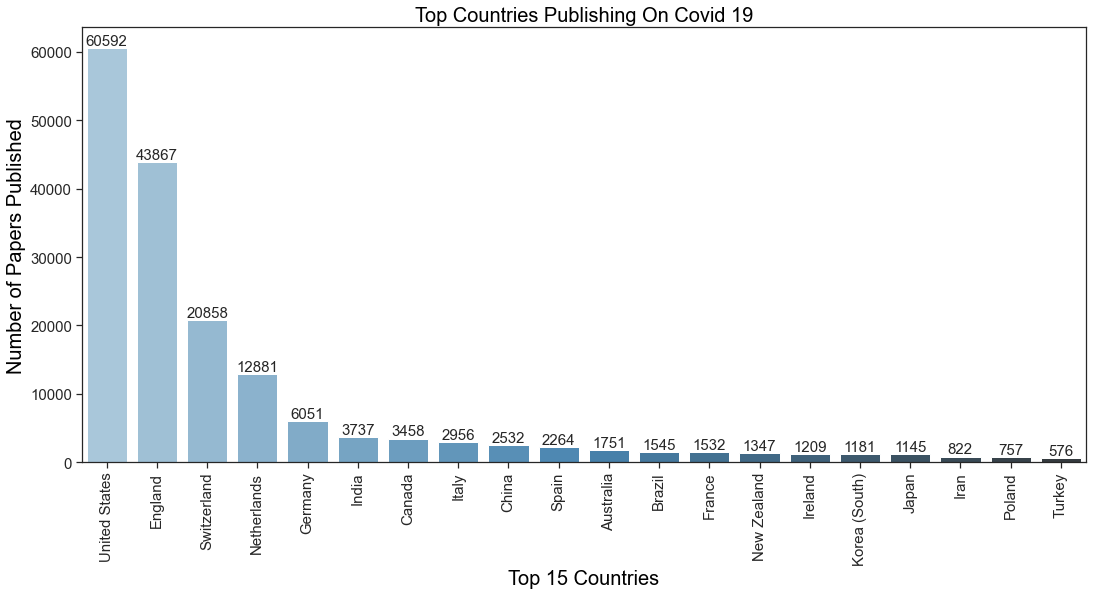

In [12]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")
num_published_country= reviews_removed.groupby('Journalinfo_country')['PMID'].count().reset_index()\
                        .rename(columns = {'PMID' : 'count'}) \
                        .sort_values('count', ascending =False).reset_index(drop= True).head(20)\
                        

ax =sns.barplot(x = 'Journalinfo_country', y = 'count', data = num_published_country, palette ="Blues_d")
ax.bar_label(ax.containers[0], fontsize=15)
plt.xlabel('Top 15 Countries',fontsize = 20, color = 'black')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'black')
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('Top Countries Publishing On Covid 19', fontsize = 20, color = 'black')
plt.savefig("../data/top_countries.png",  bbox_inches="tight")
plt.show();

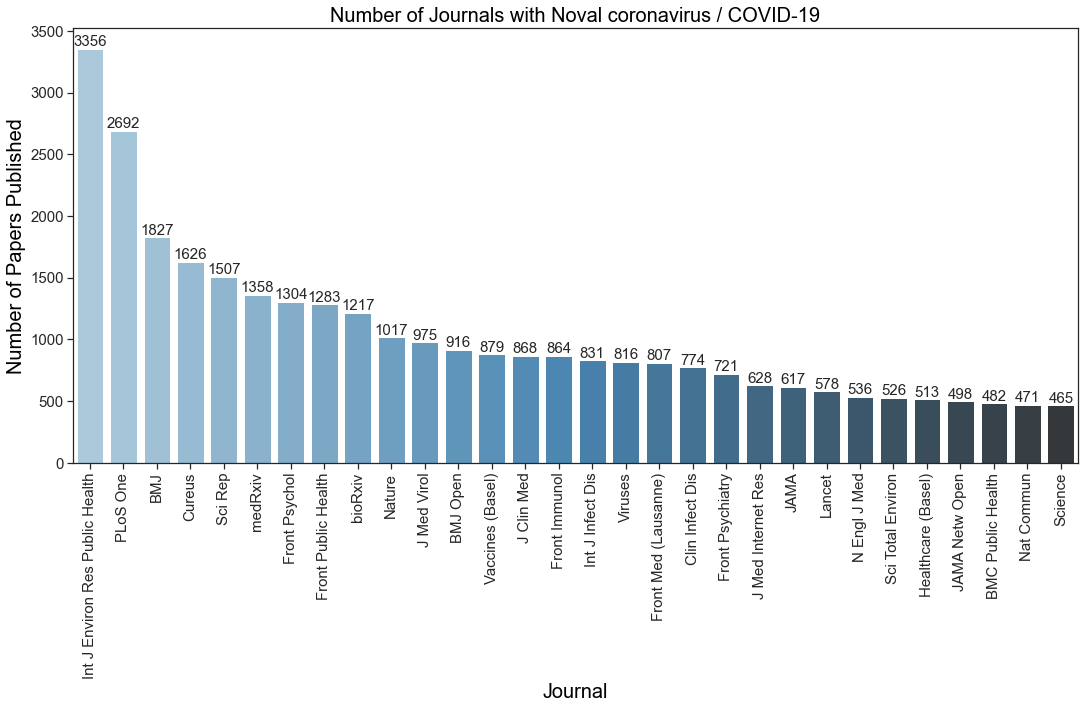

In [13]:
sns.set(rc={'figure.figsize':(18,8)}, style ='white')
sns.set_style("ticks")
total_published=  reviews_removed.groupby(['ISOAbbreviation'])[['PMID']].count()\
                         .rename(columns = {'PMID' : 'count'}) \
                         .reset_index().sort_values('count', ascending = False).reset_index(drop= True).head(30)
ax = sns.barplot(x = 'ISOAbbreviation', y = 'count', data = total_published, palette ="Blues_d", ci=None)
ax.bar_label(ax.containers[0], fontsize=15)
plt.xlabel('Journal',fontsize = 20, color = 'black')
plt.ylabel('Number of Papers Published',fontsize = 20, color = 'black')
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('Number of Journals with Noval coronavirus / COVID-19', fontsize = 20, color = 'black');

plt.savefig("../data/journals.png",  bbox_inches="tight")
plt.show();

In [14]:
covid19.to_csv(r'../data/output/covid19_42022.csv', index = False)
